In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [9]:
df = pd.read_csv('loan_data.csv')

In [10]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [11]:
Purpose=pd.get_dummies(df['purpose'],drop_first=True)

In [12]:
df=pd.concat([Purpose,df],axis=1)


In [13]:
df.drop(['purpose'],axis=1,inplace=True)

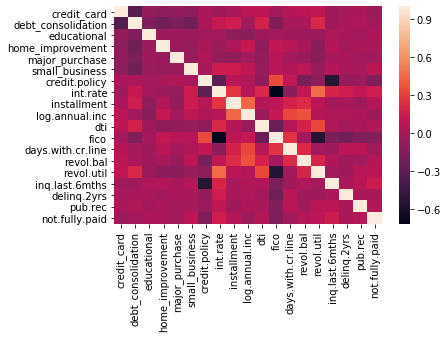

In [15]:
sns.heatmap(df.corr())

In [16]:
df.corr()

,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit_card,1.000000,-0.326850,-0.075076,-0.103279,-0.085176,-0.102397,0.003216,-0.042109,0.000774,0.072942,0.084476,-0.012512,0.046220,0.072316,0.091321,-0.033640,-0.008817,0.014842,-0.047136
debt_consolidation,-0.326850,1.000000,-0.161698,-0.222441,-0.183451,-0.220542,0.020193,0.123607,0.161658,-0.026214,0.179149,-0.154132,-0.009318,0.005785,0.211869,-0.044240,-0.000697,0.026845,-0.017543
educational,-0.075076,-0.161698,1.000000,-0.051094,-0.042138,-0.050658,-0.031346,-0.019618,-0.094510,-0.119799,-0.035325,-0.013012,-0.042621,-0.034743,-0.053128,0.024243,-0.002214,-0.013521,0.021609
home_improvement,-0.103279,-0.222441,-0.051094,1.000000,-0.057967,-0.069687,0.006036,-0.050697,0.023024,0.116375,-0.092788,0.097474,0.068087,0.003258,-0.114449,0.043827,-0.013098,0.004704,0.007272
major_purchase,-0.085176,-0.183451,-0.042138,-0.057967,1.000000,-0.057472,0.024281,-0.068978,-0.079836,-0.031020,-0.077719,0.067129,-0.020561,-0.062395,-0.108079,-0.001445,0.004085,-0.011734,-0.028580
small_business,-0.102397,-0.220542,-0.050658,-0.069687,-0.057472,1.000000,-0.003511,0.151247,0.145654,0.091540,-0.069245,0.063292,0.034883,0.083069,-0.060962,0.042567,-0.004148,-0.005595,0.084460
credit.policy,0.003216,0.020193,-0.031346,0.006036,0.024281,-0.003511,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
int.rate,-0.042109,0.123607,-0.019618,-0.050697,-0.068978,0.151247,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.000774,0.161658,-0.094510,0.023024,-0.079836,0.145654,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log.annual.inc,0.072942,-0.026214,-0.119799,0.116375,-0.031020,0.091540,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439


In [17]:
df.drop(['home_improvement','delinq.2yrs'],axis=1,inplace=True)

In [18]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scaled_array=ss.fit_transform(df.drop('not.fully.paid',axis=1))

In [19]:
X=pd.DataFrame(scaled_array,columns=df.columns[:-1]) 

In [20]:
y=df['not.fully.paid']


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
model=DecisionTreeClassifier()

In [25]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [26]:
ypred=model.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
confusion_matrix(y_test,ypred)

array([[2035,  366],
       [ 375,   98]], dtype=int64)

In [29]:
np.mean(y_test==ypred)

0.7421711899791231

In [30]:
############on SOcial network Data

In [31]:
df = pd.read_csv('Social_Network_Ads.csv')

In [32]:
df.drop('User ID',axis=1,inplace=True)

In [33]:
gender=pd.get_dummies(df['Gender'],drop_first=True)

In [34]:
df=pd.concat([gender,df],axis=1)

In [35]:
df.drop(['Gender'],axis=1,inplace=True)

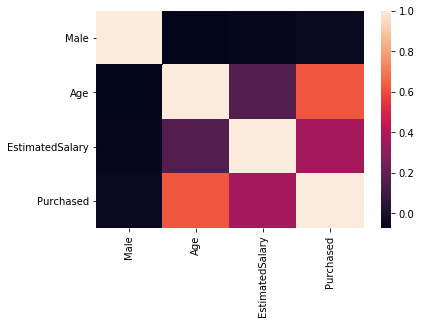

In [36]:
sns.heatmap(df.corr())

In [37]:
df.drop('Male',axis=1,inplace=True)

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
ss=StandardScaler()

In [40]:
scaled_array=ss.fit_transform(df.drop('Purchased',axis=1))

In [41]:
X=pd.DataFrame(scaled_array,columns=df.columns[:-1])

In [42]:
y=df['Purchased']

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
model=DecisionTreeClassifier()

In [47]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [48]:
ypred=model.predict(X_test)

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
confusion_matrix(y_test,ypred)

array([[66, 13],
       [ 7, 34]], dtype=int64)

In [51]:
np.mean(y_test==ypred)

0.8333333333333334

In [52]:
###### Random FOrest#########
###Random Forest: Ensemble Algo:::
#### works on random selection of units forming number of trees( n number of trees , k times)

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
model=RandomForestClassifier(n_estimators=60)

In [58]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=60,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [62]:
ypred1=model.predict(X_test)

In [63]:
from sklearn.metrics import confusion_matrix

In [64]:
confusion_matrix(y_test,ypred1)

array([[71,  8],
       [ 3, 38]], dtype=int64)

In [65]:
np.mean(ypred1==y_test)

0.9083333333333333